Here we hope to carry out a Machine learning technique to verify the hypothesis

First we will consider the feature "links in meta, script and link tags". 

According to our hypothesis we consider that link percentage less than 17% are most likely to be legitimate, while link percentage greater than 80% are likely to be phishing. 

So we can plot a graph between accuracy of the prediction vs changing the link percentage

## Feature - Links in Meata, Script and Link tags

First we consider the hypothesis for legitimate websites

In [30]:
import numpy as np
import pandas as pd
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

dataset = pd.read_csv('dataset1.csv')
X= dataset.drop(columns=['url','Result'])
Y= dataset['Result']
X.head()

,Links_in_tags,Abnormal_URL,Submitting_to_email,SFH,Iframe,popUpWidnow,on_mouseover,RightClick,Redirect
0,73.913043,-1,1,1,-1,1,1,1,0
1,85.000000,-1,1,1,-1,1,1,1,0
2,97.000000,-1,1,1,-1,1,1,1,1
3,12.000000,-1,1,-1,1,-1,-1,-1,0
4,55.555556,-1,1,-1,1,-1,-1,-1,0


In [31]:
links_col = pd.DataFrame(X['Links_in_tags'])

graph_data = pd.DataFrame()
graph_data["Links_in_tags"] = range(80)


accuracy_arr = ['none']*80

for num1 in range(80):
    conds = [links_col.values < num1 , links_col.values > 81]

    choices = ['-1', '1']
    col = pd.DataFrame(np.select(conds, choices, default='0'),
                       index=links_col.index,
                       columns=links_col.columns)
    
    # append the updated length_url column to remaining dataset
    X_new = X.assign(Links_in_tags=col['Links_in_tags'])
    train_X,test_X,train_Y,test_Y=train_test_split(X_new,Y,test_size=0.2,random_state=2)
    
    # test using logistic regression
    #logreg=LogisticRegression()
    #model_1=logreg.fit(train_X,train_Y)   
    rfc=RandomForestClassifier()
    model_1=rfc.fit(train_X,train_Y)

    #logreg_predict= model_1.predict(test_X)
    #accuracy_arr[num1] = accuracy_score(logreg_predict,test_Y)*100
    rfc_predict= model_1.predict(test_X)
    accuracy_arr[num1] = accuracy_score(rfc_predict,test_Y)*100
    
graph_data["accuracy"] = accuracy_arr 
graph_data.head()

,Links_in_tags,accuracy
0,0,79.4375
1,1,79.5000
2,2,79.5625
3,3,79.5625
4,4,79.6250


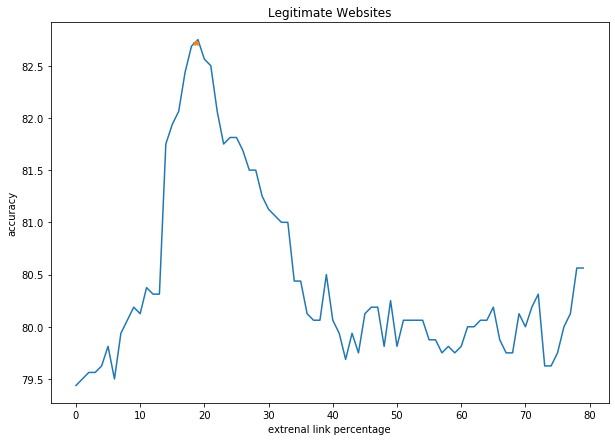

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.title('Legitimate Websites')
plt.xlabel('extrenal link percentage')
plt.ylabel('accuracy')

plt.plot(graph_data['Links_in_tags'].values, graph_data['accuracy'].values )
plt.plot(18.7,82.72, '*')
plt.show()


According to the above graph, it gives highest accuracy at 18.7 on x axis. So that we can conclude that, when the links in tag percentage is less than 19% it can be a legitimate website.

Phishing websites

In [42]:
links_col = pd.DataFrame(X['Links_in_tags'])

graph_data = pd.DataFrame()
# graph_data["Links_in_tags"] = range(80)
graph_data["Links_in_tags"] = range(70,100)


accuracy_arr = ['none']*30

for num1 in range(70,100):
    #conds = [links_col.values < num1 , links_col.values > 81]
    conds = [links_col.values < 17 , links_col.values > num1]

    choices = ['-1', '1']
    col = pd.DataFrame(np.select(conds, choices, default='0'),
                       index=links_col.index,
                       columns=links_col.columns)
    
    # append the updated length_url column to remaining dataset
    X_new = X.assign(Links_in_tags=col['Links_in_tags'])
    train_X,test_X,train_Y,test_Y=train_test_split(X_new,Y,test_size=0.2,random_state=2)
    
    # test using logistic regression
    #logreg=LogisticRegression()
    #model_1=logreg.fit(train_X,train_Y)
    rfc=RandomForestClassifier()
    model_1=rfc.fit(train_X,train_Y)

    #logreg_predict= model_1.predict(test_X)
    #accuracy_arr[num1-70] = accuracy_score(logreg_predict,test_Y)*100
    rfc_predict= model_1.predict(test_X)
    accuracy_arr[num1-70] = accuracy_score(rfc_predict,test_Y)*100
    
graph_data["accuracy"] = accuracy_arr 
graph_data.head()

,Links_in_tags,accuracy
0,70,81.6875
1,71,81.6875
2,72,82.0000
3,73,82.1875
4,74,82.2500


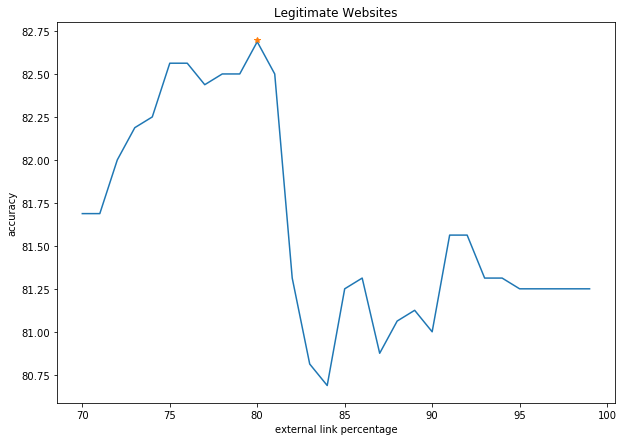

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.title('Legitimate Websites')
plt.xlabel('external link percentage')
plt.ylabel('accuracy')

plt.plot(graph_data['Links_in_tags'].values, graph_data['accuracy'].values )
plt.plot(80,82.7, '*')
plt.show()


According to the above graph, it gives highest accuracy at 80 on x axis. So that we can conclude that, when the links in tag percentage is higher than 80% it can be a legitimate website.

## Feature - Website Forwarding

In [1]:
import numpy as np
import pandas as pd
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

dataset = pd.read_csv('dataset1.csv')
X= dataset.drop(columns=['url','Result'])
Y= dataset['Result']
X.head()

,Links_in_tags,Abnormal_URL,Submitting_to_email,SFH,Iframe,popUpWidnow,on_mouseover,RightClick,Redirect
0,73.913043,-1,1,1,-1,1,1,1,0
1,85.000000,-1,1,1,-1,1,1,1,0
2,97.000000,-1,1,1,-1,1,1,1,1
3,12.000000,-1,1,-1,1,-1,-1,-1,0
4,55.555556,-1,1,-1,1,-1,-1,-1,0


Let us consider the phishing websites


In [3]:
redirect_col = pd.DataFrame(X['Redirect'])

graph_data = pd.DataFrame()
graph_data["Redirect"] = range(2,8)

accuracy_arr = ['none']*6   #set empty colomn for plotting accuracy of each row

for num1 in range(2,8):
    conds = [redirect_col.values < 1 , redirect_col.values > num1]

    choices = ['-1', '1']
    col = pd.DataFrame(np.select(conds, choices, default='0'),
                       index=redirect_col.index,
                       columns=redirect_col.columns)
    
    # append the updated redirect column to remaining dataset
    X_new = X.assign(Redirect=col['Redirect'])
    train_X,test_X,train_Y,test_Y=train_test_split(X_new,Y,test_size=0.2,random_state=2)
    
    # test using logistic regression
    #logreg=LogisticRegression()
    #model_1=logreg.fit(train_X,train_Y)   
    rfc=RandomForestClassifier()
    model_1=rfc.fit(train_X,train_Y)

    #logreg_predict= model_1.predict(test_X)
    #accuracy_arr[num1] = accuracy_score(logreg_predict,test_Y)*100
    rfc_predict= model_1.predict(test_X)
    accuracy_arr[num1-2] = accuracy_score(rfc_predict,test_Y)*100
    
graph_data["accuracy"] = accuracy_arr 
graph_data.head()

,Redirect,accuracy
0,2,88.7500
1,3,89.0000
2,4,88.8750
3,5,89.4375
4,6,88.6875


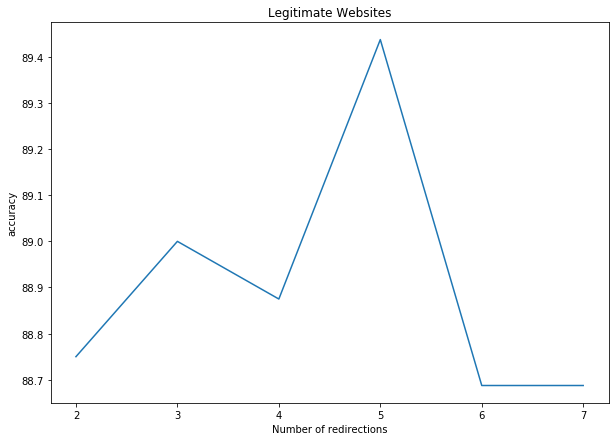

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.title('Legitimate Websites')
plt.xlabel('Number of redirections')
plt.ylabel('accuracy')

plt.plot(graph_data['Redirect'].values, graph_data['accuracy'].values )
# plt.plot(80,82.7, '*')
plt.show()


Lets consider the legitimate websites

In [5]:
redirect_col = pd.DataFrame(X['Redirect'])

graph_data = pd.DataFrame()
graph_data["Redirect"] = range(4)

accuracy_arr = ['none']*4   #set empty colomn for plotting accuracy of each row

for num1 in range(4):
    conds = [redirect_col.values < num1 , redirect_col.values > 5]

    choices = ['-1', '1']
    col = pd.DataFrame(np.select(conds, choices, default='0'),
                       index=redirect_col.index,
                       columns=redirect_col.columns)
    
    # append the updated redirect column to remaining dataset
    X_new = X.assign(Redirect=col['Redirect'])
    train_X,test_X,train_Y,test_Y=train_test_split(X_new,Y,test_size=0.2,random_state=2)
    
    # test using logistic regression
    #logreg=LogisticRegression()
    #model_1=logreg.fit(train_X,train_Y)   
    rfc=RandomForestClassifier()
    model_1=rfc.fit(train_X,train_Y)

    #logreg_predict= model_1.predict(test_X)
    #accuracy_arr[num1] = accuracy_score(logreg_predict,test_Y)*100
    rfc_predict= model_1.predict(test_X)
    accuracy_arr[num1] = accuracy_score(rfc_predict,test_Y)*100
    
graph_data["accuracy"] = accuracy_arr 
graph_data.head()

,Redirect,accuracy
0,0,89.250
1,1,89.125
2,2,89.125
3,3,89.000


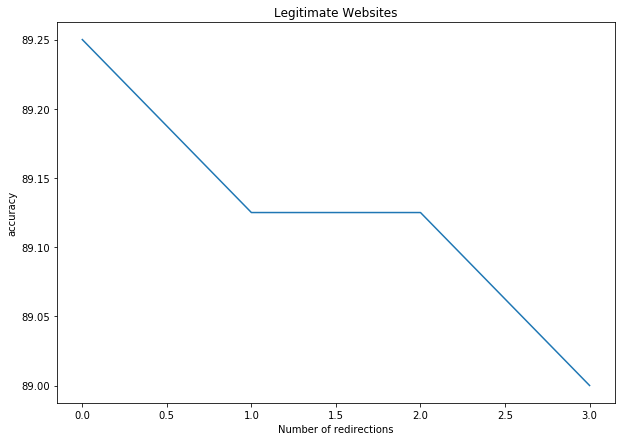

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.title('Legitimate Websites')
plt.xlabel('Number of redirections')
plt.ylabel('accuracy')

plt.plot(graph_data['Redirect'].values, graph_data['accuracy'].values )
# plt.plot(80,82.7, '*')
plt.show()